In [1]:
import importlib
import random
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import functions
functions = importlib.reload(functions)

In [2]:
# define environment.time_to_switch
# define agent.phenotype
# define agent.mutation_rate

In [3]:
def converged(states):
    return len(np.unique(states)) == 1

def simulate_bd(n_agents, 
                fitnesses, 
                init_environment,
                environment_duration,
                max_iter=1000):
    
    agent_states = np.zeros(n_agents).astype(int)
    agent_states[0] = 1  # initial mutation
    environment = init_environment
    time_to_switch = environment_duration()

    iter_count = 0
    while iter_count < max_iter and not converged(agent_states):
        # Check for environment switch
        if time_to_switch <= 0:
            environment = 1 - environment
            time_to_switch = environment_duration()

        # Get agent fitnesses in the current environment
        fitness_landscape = fitnesses[environment]
        weights = np.array([fitness_landscape[state] for state in agent_states])
        
        # Choose agent to birth based on fitness
        idx = list(range(len(agent_states)))
        birth_node = random.choices(idx, weights=weights)[0]

        # Uniformly choose a different agent to die
        idx.remove(birth_node)
        death_node = random.choice(idx)

        # Update agent states
        agent_states[death_node] = agent_states[birth_node]

        # Update timestep
        time_to_switch -= 1
        iter_count +=1
    
    mutant_freq = np.mean(agent_states)
    return mutant_freq

In [4]:
environment_duration = lambda: np.random.gamma(25, 25) + 1
# environment_duration = lambda: 1e7

s = 1.
fitnesses = [[1, 1+s],[1+s, 1]]
n_agents = 100

mutant_freqs = []
for _ in range(100):
    init_environment = random.randint(0, 1)
#     init_environment = 0
    mutant_freq = simulate_bd(n_agents, 
                              fitnesses, 
                              init_environment, 
                              environment_duration,
                              max_iter=10000)
    mutant_freqs.append(mutant_freq)
print(np.mean(mutant_freqs))

0.1073


In [83]:
def simulate_bd(n_agents, 
                fitnesses, 
                init_environment,
                environment_duration,
                max_iter=1000):
    
    agent_states = np.zeros(n_agents).astype(int)
    agent_states[0] = 1  # initial mutation
    environment = init_environment
    time_to_switch = environment_duration()

    iter_count = 0
    while iter_count < max_iter and not converged(agent_states):
        # Check for environment switch
        if time_to_switch <= 0:
            environment = 1 - environment
            time_to_switch = environment_duration()

        # Get agent fitnesses in the current environment
        fitness_landscape = fitnesses[environment]
        weights = np.array([fitness_landscape[state] for state in agent_states])
        
        # Choose agent to birth based on fitness
        idx = list(range(len(agent_states)))
        birth_node = random.choices(idx, weights=weights)[0]

        # Uniformly choose a different agent to die
        idx.remove(birth_node)
        death_node = random.choice(idx)

        # Update agent states
        agent_states[death_node] = agent_states[birth_node]

        # Update timestep
        time_to_switch -= 1
        iter_count +=1
    
    mutant_freq = np.mean(agent_states)
    return mutant_freq

1

In [85]:
from tqdm import tqdm

params = [(m, v) for m in range(-5,5) for v in np.linspace(0.1, 5, 10)]

freq_list = []

for param in tqdm(params):

    s = -0.8
    fitnesses = [[1, 1+s],[1+s, 1]]
    n_agents = 10
    
    mutant_freqs = []
    for _ in range(500):
        init_environment = random.randint(0, 1)
        def environment_duration():
            return np.random.lognormal(param[0], param[1]) + 1
        
        mutant_freq = simulate_bd(n_agents, 
                                  fitnesses, 
                                  init_environment, 
                                  environment_duration,
                                  max_iter=1000)
        mutant_freqs.append(mutant_freq)
    
    #print(np.mean(mutant_freqs))
    freq_list.append(np.mean(mutant_freqs))

100%|██████████| 100/100 [00:51<00:00,  1.96it/s]


In [88]:
freq_arr2 = np.array(freq_list)
freq_arr2 = np.reshape(freq_arr2, (10,10))

In [79]:
#freq_arr2 = np.array(freq_list2)
#freq_arr

array([0.134, 0.116, 0.156, 0.138, 0.164, 0.118, 0.114, 0.156, 0.146,
       0.142, 0.13 , 0.104, 0.138, 0.118, 0.114, 0.126, 0.128, 0.128,
       0.15 , 0.164, 0.14 , 0.122, 0.128, 0.134, 0.144, 0.136, 0.158,
       0.158, 0.17 , 0.154, 0.15 , 0.106, 0.112, 0.126, 0.154, 0.148,
       0.122, 0.162, 0.156, 0.164, 0.134, 0.11 , 0.144, 0.12 , 0.148,
       0.142, 0.178, 0.168, 0.15 , 0.184, 0.134, 0.146, 0.134, 0.132,
       0.16 , 0.156, 0.218, 0.188, 0.182, 0.198, 0.12 , 0.098, 0.124,
       0.152, 0.134, 0.172, 0.176, 0.208, 0.216, 0.182, 0.126, 0.14 ,
       0.146, 0.15 , 0.194, 0.182, 0.17 , 0.19 , 0.178, 0.204, 0.162,
       0.13 , 0.18 , 0.19 , 0.188, 0.188, 0.2  , 0.184, 0.188, 0.202,
       0.202, 0.184, 0.23 , 0.204, 0.166, 0.224, 0.214, 0.202, 0.234,
       0.214])

In [80]:
freq_arr = np.reshape(freq_arr, (10,10))

Text(0.5, 1.0, 'N = 10 | s = 1')

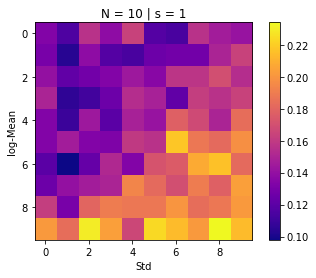

In [81]:
#plt.figure(figsize=(6,10))
plt.imshow(freq_arr, cmap='plasma')
plt.colorbar()
plt.ylabel('log-Mean')
plt.xlabel('log-Std')
plt.title('N = 10 | s = 1')

Text(0.5, 1.0, 'N = 10 | s = -.8')

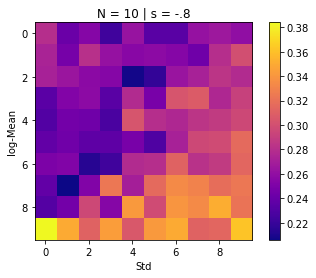

In [89]:
#plt.figure(figsize=(6,10))
plt.imshow(freq_arr2, cmap='plasma')
plt.colorbar()
plt.ylabel('log-Mean')
plt.xlabel('log-Std')
plt.title('N = 10 | s = -.8')

In [72]:
np.array_equal(freq_arr, freq_arr2)

True

In [73]:
freq_arr

array([[0.094, 0.15 , 0.126, 0.128, 0.126, 0.136, 0.126, 0.134, 0.114,
        0.12 , 0.13 , 0.146, 0.144, 0.114, 0.124, 0.12 , 0.146, 0.112,
        0.13 , 0.104, 0.116, 0.134, 0.142, 0.126, 0.142, 0.134, 0.132,
        0.142, 0.128, 0.112],
       [0.152, 0.128, 0.134, 0.126, 0.116, 0.118, 0.132, 0.132, 0.112,
        0.114, 0.132, 0.138, 0.15 , 0.118, 0.102, 0.124, 0.118, 0.104,
        0.128, 0.122, 0.13 , 0.138, 0.15 , 0.13 , 0.114, 0.126, 0.116,
        0.154, 0.126, 0.11 ],
       [0.14 , 0.144, 0.128, 0.13 , 0.146, 0.112, 0.158, 0.114, 0.15 ,
        0.15 , 0.146, 0.112, 0.144, 0.126, 0.152, 0.128, 0.132, 0.148,
        0.118, 0.132, 0.14 , 0.14 , 0.12 , 0.128, 0.118, 0.134, 0.144,
        0.132, 0.126, 0.144],
       [0.12 , 0.126, 0.112, 0.13 , 0.098, 0.136, 0.124, 0.126, 0.106,
        0.128, 0.11 , 0.128, 0.148, 0.138, 0.128, 0.116, 0.132, 0.11 ,
        0.158, 0.128, 0.144, 0.146, 0.162, 0.156, 0.164, 0.152, 0.152,
        0.164, 0.144, 0.168],
       [0.118, 0.146, 0.132,

In [74]:
freq_arr2

array([[0.094, 0.15 , 0.126, 0.128, 0.126, 0.136, 0.126, 0.134, 0.114,
        0.12 , 0.13 , 0.146, 0.144, 0.114, 0.124, 0.12 , 0.146, 0.112,
        0.13 , 0.104, 0.116, 0.134, 0.142, 0.126, 0.142, 0.134, 0.132,
        0.142, 0.128, 0.112],
       [0.152, 0.128, 0.134, 0.126, 0.116, 0.118, 0.132, 0.132, 0.112,
        0.114, 0.132, 0.138, 0.15 , 0.118, 0.102, 0.124, 0.118, 0.104,
        0.128, 0.122, 0.13 , 0.138, 0.15 , 0.13 , 0.114, 0.126, 0.116,
        0.154, 0.126, 0.11 ],
       [0.14 , 0.144, 0.128, 0.13 , 0.146, 0.112, 0.158, 0.114, 0.15 ,
        0.15 , 0.146, 0.112, 0.144, 0.126, 0.152, 0.128, 0.132, 0.148,
        0.118, 0.132, 0.14 , 0.14 , 0.12 , 0.128, 0.118, 0.134, 0.144,
        0.132, 0.126, 0.144],
       [0.12 , 0.126, 0.112, 0.13 , 0.098, 0.136, 0.124, 0.126, 0.106,
        0.128, 0.11 , 0.128, 0.148, 0.138, 0.128, 0.116, 0.132, 0.11 ,
        0.158, 0.128, 0.144, 0.146, 0.162, 0.156, 0.164, 0.152, 0.152,
        0.164, 0.144, 0.168],
       [0.118, 0.146, 0.132,

In [75]:
np.max(freq_arr2)

0.232

In [90]:
np.exp(5)

148.4131591025766